In [2]:
import numpy as np
import pandas as pd
import sklearn
# Raw URL of the CSV file
data_url = "./BostonHousing.csv"
# Read the CSV file
boston = pd.read_csv(data_url)
boston[:5]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
X = boston.drop('medv', axis=1)
Y = boston['medv']

import xgboost
import xgboost as xgb

# 使用 XGBoost 训练模型
d_param = {
    "learning_rate": 0.01
}
dtrain = xgb.DMatrix(X, label=Y)
model = xgb.train(params=d_param, dtrain=dtrain, num_boost_round=100)

# 使用模型进行预测
y = model.predict(dtrain)



<>:17: SyntaxWarning: invalid escape sequence '\L'
<>:17: SyntaxWarning: invalid escape sequence '\L'
/tmp/ipykernel_1323021/664331090.py:17: SyntaxWarning: invalid escape sequence '\L'
  'B', '%\Lower Income in Area'
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:01
 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00
 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00
 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00
 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00
 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00
 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00
 81% (9 of 11) |####################     | Elapsed Time: 0:00:

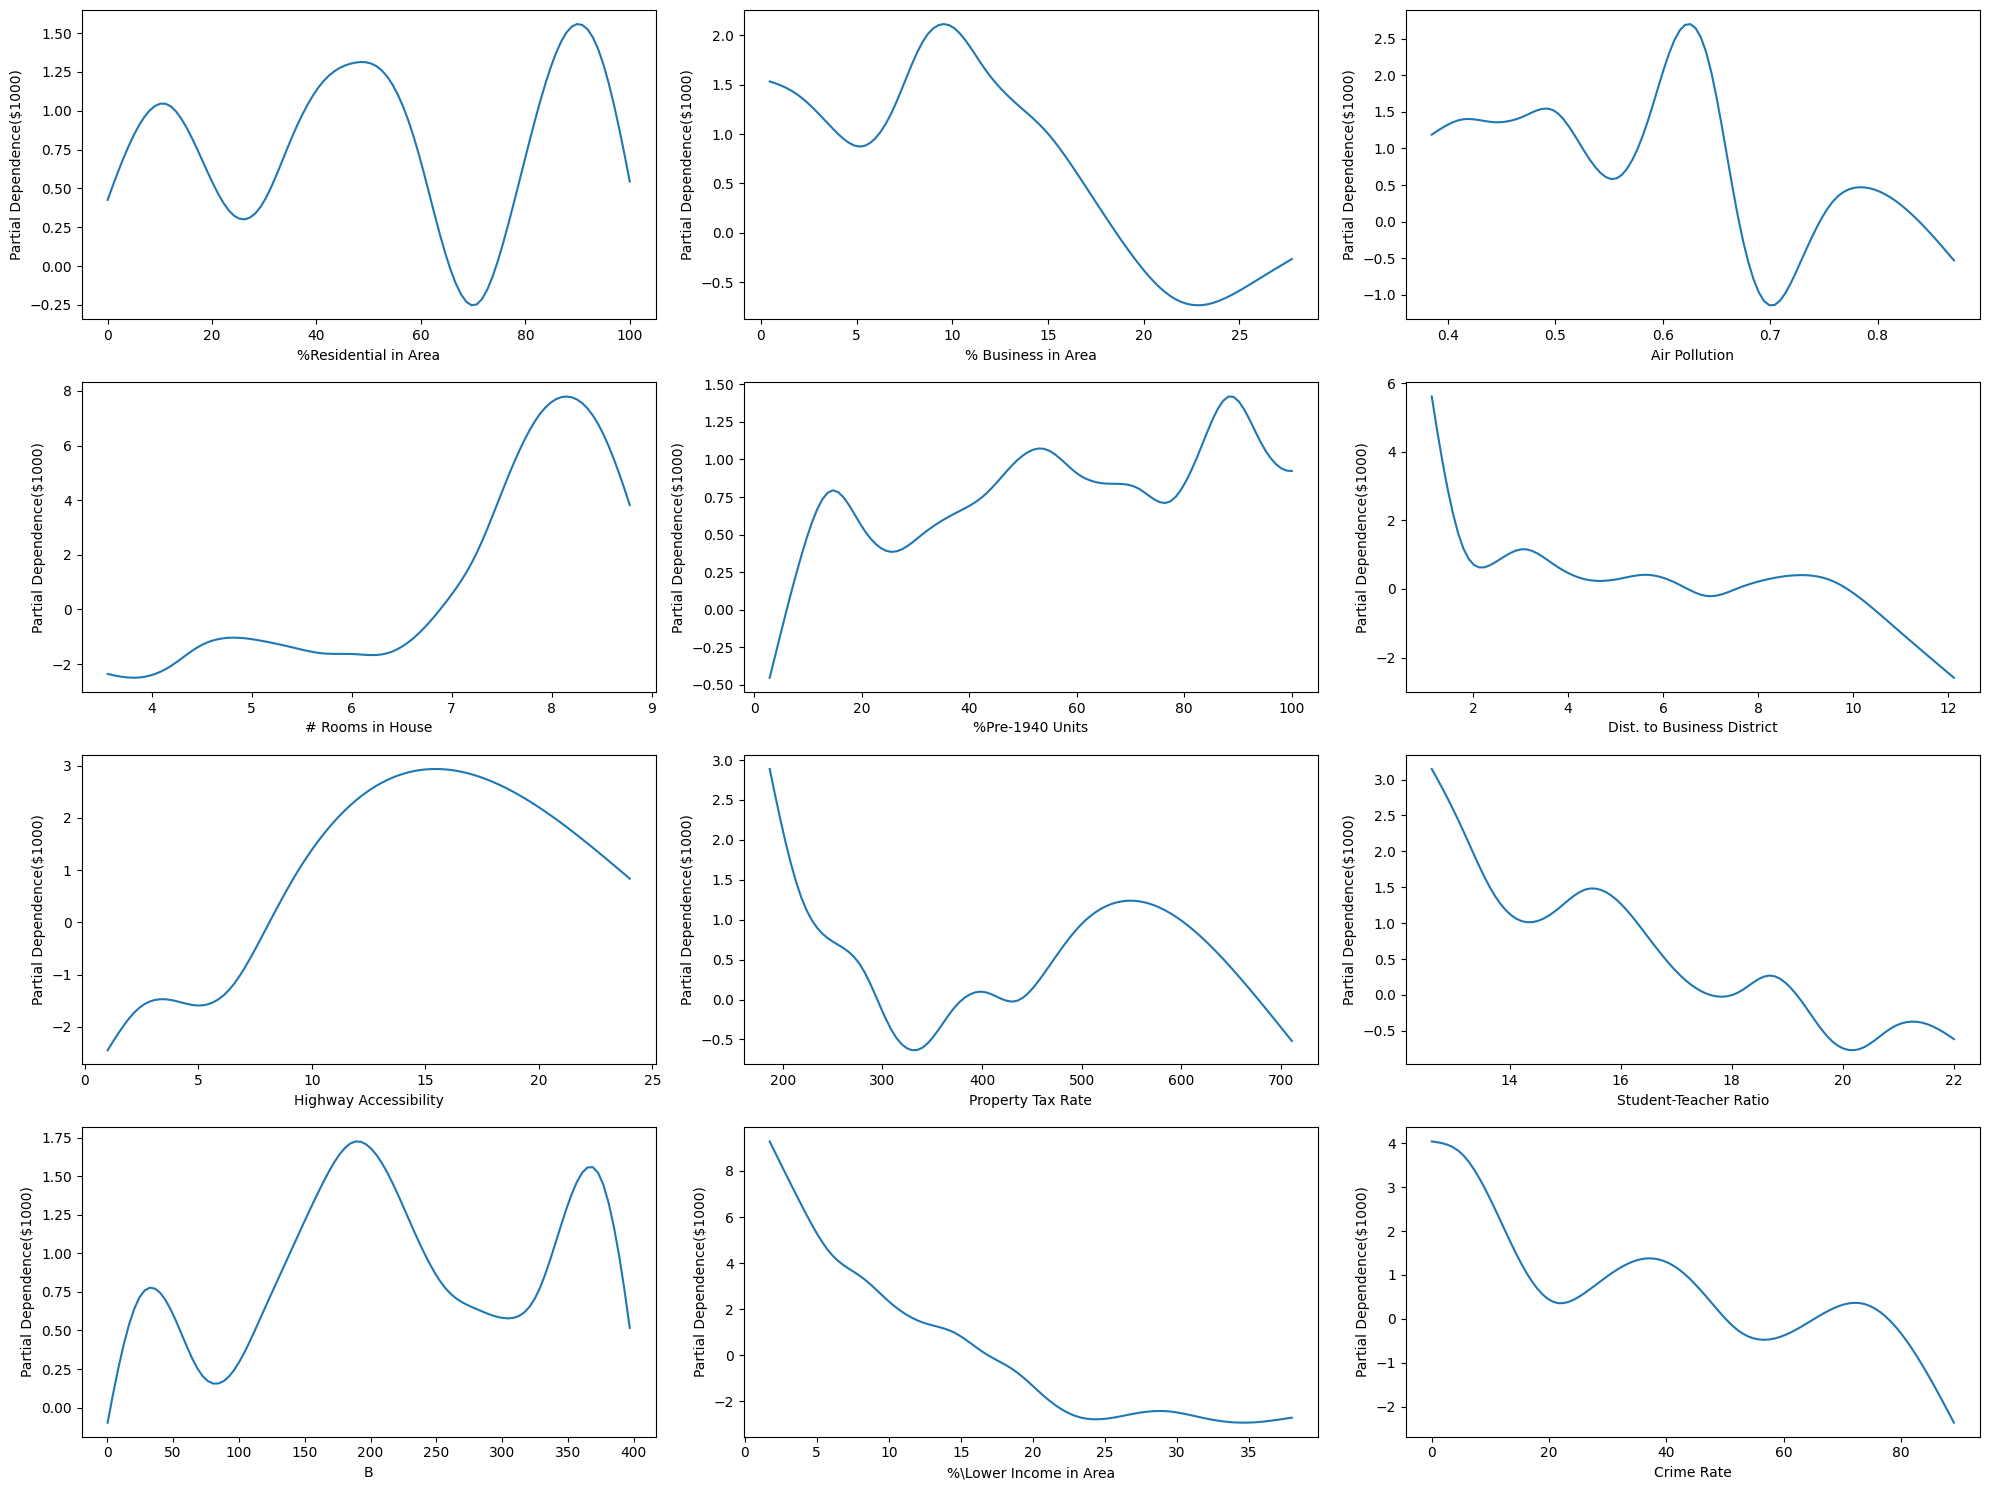

In [4]:
# Define the GAM model including all features
from pygam import LinearGAM, s
import matplotlib.pyplot as plt
gam = LinearGAM(s(0) + s(1) + s(2) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12))

# Perform grid search to find the best smoothing parameters
gam.gridsearch(X.values, y)

# Fit the model to the data
gam.fit(X.values, y)


english_feature_names = [
    'Crime Rate', '%Residential in Area', '% Business in Area',
    '','Air Pollution', '# Rooms in House', '%Pre-1940 Units',
    'Dist. to Business District', 'Highway Accessibility', 'Property Tax Rate', 'Student-Teacher Ratio',
    'B', '%\Lower Income in Area'
]
# Plot the partial dependence for each feature
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))
axs = axs.flatten()
pdp_points = {}

for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue
    XX = gam.generate_X_grid(term=i)
    pdep = gam.partial_dependence(term=i)
    feature_index = term.feature
    
    # Correctly collect the points
    feature_name = english_feature_names[feature_index]
    pdp_points[feature_name] = {'X': XX[:, feature_index], 'Y': pdep}
    
    feature_name = english_feature_names[feature_index]
    pdp_points[feature_name] = {'X': XX[:, feature_index], 'Y': pdep}
    feature_index = term.feature

    axs[i-1].plot(XX[:, feature_index], pdep)
    # axs[i-1].plot(XX[:, feature_index], confi, c='r', ls='--')
    axs[i-1].set_xlabel(english_feature_names[feature_index])
    # axs[i-1].set_title(X.columns[feature_index])
    axs[i-1].set_ylabel('Partial Dependence($1000)')

plt.tight_layout()
plt.show()

<>:17: SyntaxWarning: invalid escape sequence '\L'
<>:17: SyntaxWarning: invalid escape sequence '\L'
/tmp/ipykernel_1323021/4270024350.py:17: SyntaxWarning: invalid escape sequence '\L'
  'B', '%\Lower Income in Area'
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:00
 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00
 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


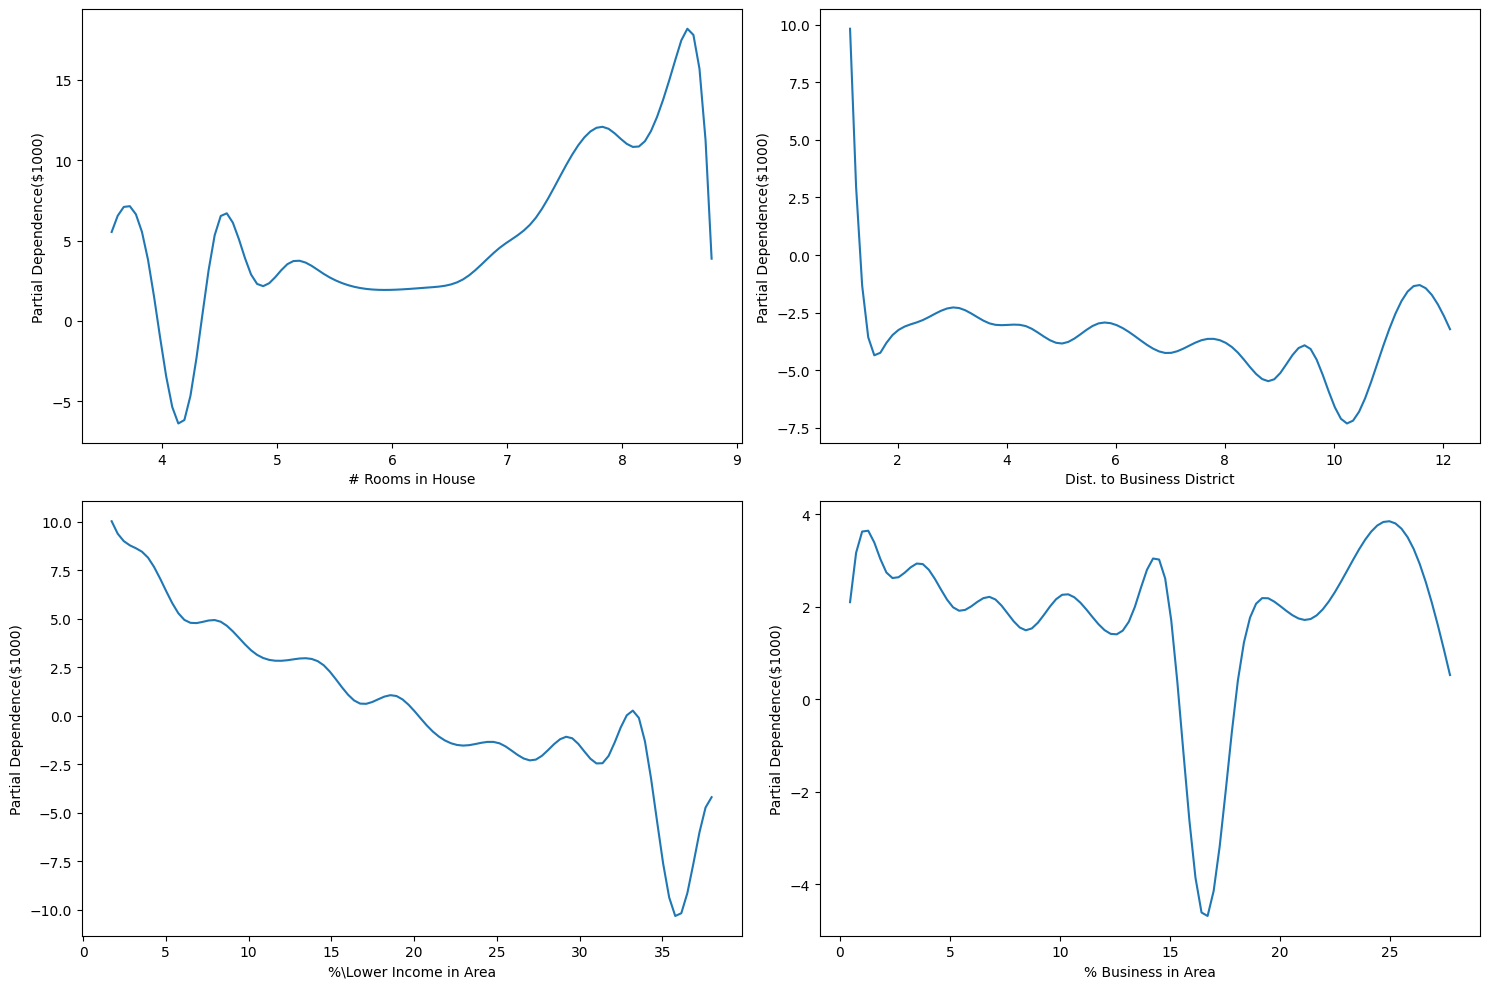

In [9]:
# Define the GAM model including all features
from pygam import LinearGAM, s
import matplotlib.pyplot as plt
gam = LinearGAM( s(2) + s(5) + s(7) + s(12))

# Perform grid search to find the best smoothing parameters
gam.gridsearch(X.values, y)

# Fit the model to the data
gam.fit(X.values, y)


english_feature_names = [
    'Crime Rate', '%Residential in Area', '% Business in Area',
    '','Air Pollution', '# Rooms in House', '%Pre-1940 Units',
    'Dist. to Business District', 'Highway Accessibility', 'Property Tax Rate', 'Student-Teacher Ratio',
    'B', '%\Lower Income in Area'
]
# Plot the partial dependence for each feature
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axs = axs.flatten()
pdp_points = {}

for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue
    XX = gam.generate_X_grid(term=i)
    pdep = gam.partial_dependence(term=i)
    feature_index = term.feature
    
    # Correctly collect the points
    feature_name = english_feature_names[feature_index]
    pdp_points[feature_name] = {'X': XX[:, feature_index], 'Y': pdep}
    
    feature_name = english_feature_names[feature_index]
    pdp_points[feature_name] = {'X': XX[:, feature_index], 'Y': pdep}
    feature_index = term.feature

    axs[i-1].plot(XX[:, feature_index], pdep)
    # axs[i-1].plot(XX[:, feature_index], confi, c='r', ls='--')
    axs[i-1].set_xlabel(english_feature_names[feature_index])
    # axs[i-1].set_title(X.columns[feature_index])
    axs[i-1].set_ylabel('Partial Dependence($1000)')

plt.tight_layout()
plt.show()

In [54]:
pdp_points['Dist. to Business District']

{'X': array([ 1.1296    ,  1.2406798 ,  1.3517596 ,  1.46283939,  1.57391919,
         1.68499899,  1.79607879,  1.90715859,  2.01823838,  2.12931818,
         2.24039798,  2.35147778,  2.46255758,  2.57363737,  2.68471717,
         2.79579697,  2.90687677,  3.01795657,  3.12903636,  3.24011616,
         3.35119596,  3.46227576,  3.57335556,  3.68443535,  3.79551515,
         3.90659495,  4.01767475,  4.12875455,  4.23983434,  4.35091414,
         4.46199394,  4.57307374,  4.68415354,  4.79523333,  4.90631313,
         5.01739293,  5.12847273,  5.23955253,  5.35063232,  5.46171212,
         5.57279192,  5.68387172,  5.79495152,  5.90603131,  6.01711111,
         6.12819091,  6.23927071,  6.35035051,  6.4614303 ,  6.5725101 ,
         6.6835899 ,  6.7946697 ,  6.90574949,  7.01682929,  7.12790909,
         7.23898889,  7.35006869,  7.46114848,  7.57222828,  7.68330808,
         7.79438788,  7.90546768,  8.01654747,  8.12762727,  8.23870707,
         8.34978687,  8.46086667,  8.57194646,